In [ ]:
%matplotlib inline

**IBM QISKIT CODE**

In [ ]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=6438853770a0965e09013fd6729154497c8c0e79ea35413e7eceb3ce8800ac81
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


Adding gates before the CNOT (on qubit 0) doesn't break the symmetry of the entangled state — so it often doesn't change the fact that the reduced density matrices of qubit 0 and qubit 1 are identical after CNOT.

Even if the reduced density matrices are equal we have to check it for purity:

Pure states have Tr(ρ²) = 1. For mixed states, Tr(ρ²) < 1

If the result is False, the states are mixed — hence no cloning occurred.

*   Identical reduced density matrices do not imply successful cloning.

*   **The qubits are entangled, not cloned.**

*   True cloning would require both qubits to be in identical pure states, which violates the no-cloning theorem.

**Why do the reduced density matrices look identical?**
*   When you apply a CNOT on a symmetric input like a superposition state, it creates an entangled state like the Bell state.
*   In entanglement, both qubits look identical individually, but neither contains the full information alone.
*   The full information is in the entangled pair — not in each qubit.


**Qiskit's `U(θ, φ, λ)` Gate Formula**

In Qiskit, the `U` gate is a **universal single-qubit gate** defined as:

$$
U(\theta, \phi, \lambda) =
\begin{bmatrix}
\cos\left(\frac{\theta}{2}\right) & -e^{i\lambda} \sin\left(\frac{\theta}{2}\right) \\
e^{i\phi} \sin\left(\frac{\theta}{2}\right) & e^{i(\phi + \lambda)} \cos\left(\frac{\theta}{2}\right)
\end{bmatrix}
$$

This gate can generate **any arbitrary single-qubit unitary** when θ, φ, and λ are appropriately chosen.

Special cases of the U gate:

* **Hadamard**: `U(π/2, 0, π)`
* **X gate**: `U(π, 0, π)`
* **Y gate**: `U(π, π/2, π/2)`
* **Z gate**: `U(0, 0, π)`
* **Identity (I)**: `U(0, 0, 0)`
* **S gate**: `U(0, 0, π/2)`
* **T gate**: `U(0, 0, π/4)`

Rotation gates in terms of U:

* **Rx(θ)**: `U(θ, -π/2, π/2)`
* **Ry(θ)**: `U(θ, 0, 0)`
* **Rz(λ)**: `U(0, 0, λ)`


```python
qc.u(theta, phi, lambda, qubit_index)
```


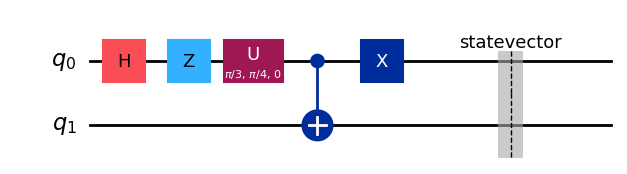

Reduced state of Qubit 0:
DensityMatrix([[0.0669873+0.j, 0.       +0.j],
               [0.       +0.j, 0.9330127+0.j]],
              dims=(2,))

Reduced state of Qubit 1:
DensityMatrix([[0.9330127+0.j, 0.       +0.j],
               [0.       +0.j, 0.0669873+0.j]],
              dims=(2,))

Qubits are different — No-Cloning Theorem verified.
Is Qubit 0 pure? False
Is Qubit 1 pure? False
Full statevector: Statevector([ 0.        +0.j       ,  0.96592583+0.j       ,
             -0.1830127 -0.1830127j,  0.        +0.j       ],
            dims=(2, 2))


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import Statevector, partial_trace
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
qc = QuantumCircuit(2)
qc.h(0)
qc.z(0)

theta = np.pi / 3
phi = np.pi / 4
qc.u(theta, phi, 0, 0)  # U gate prepares arbitrary state

# Attempt to clone using CNOT (not valid cloning)
qc.cx(0, 1)
qc.x(0)

qc.save_statevector()


display(circuit_drawer(qc, output='mpl'))

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

final_state = result.data(0)['statevector']
state = Statevector(final_state)

reduced_q0 = partial_trace(state, [1])
reduced_q1 = partial_trace(state, [0])

print("Reduced state of Qubit 0:")
print(reduced_q0)

print("\nReduced state of Qubit 1:")
print(reduced_q1)

# Check if they are the same (which they shouldn't be)
are_same = np.allclose(reduced_q0.data, reduced_q1.data, atol=1e-2)
if are_same:
    print("\nQubits appear identical — unexpected for arbitrary states.")
else:
    print("\nQubits are different — No-Cloning Theorem verified.")


# Check purity
def is_pure(rho):
    return np.isclose((rho.data @ rho.data).trace().real, 1.0)

print("Is Qubit 0 pure?", is_pure(reduced_q0))
print("Is Qubit 1 pure?", is_pure(reduced_q1))

print("Full statevector:", state)



**PENNYLANE CODE**

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 46.9 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)

theta = np.pi / 3
phi = np.pi / 4

@qml.qnode(dev)
def circuit():
    qml.Rot(theta, phi, 0, wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

state = circuit()

def reduced_density_matrix(state, wire_to_trace_out):
    # state is a 2-qubit statevector of length 4
    # reshape to 2x2 matrix for partial trace
    rho = np.outer(state, np.conj(state))

    if wire_to_trace_out == 0:

        # rho shape: 4x4, reshape to (2,2,2,2)
        rho_reshaped = rho.reshape(2,2,2,2)
        # partial trace over first qubit indices: sum over axis 0 and 2
        reduced = np.trace(rho_reshaped, axis1=0, axis2=2)
    else:
        rho_reshaped = rho.reshape(2,2,2,2)
        reduced = np.trace(rho_reshaped, axis1=1, axis2=3)
    return reduced

reduced_q0 = reduced_density_matrix(state, 1)
reduced_q1 = reduced_density_matrix(state, 0)

print("Reduced state of Qubit 0:")
print(reduced_q0)

print("\nReduced state of Qubit 1:")
print(reduced_q1)

# Check if reduced states are close
are_same = np.allclose(reduced_q0, reduced_q1, atol=1e-2)
if are_same:
    print("\nQubits appear identical — unexpected for arbitrary states.")
else:
    print("\nQubits are different — No-Cloning Theorem verified.")

# Purity function
def is_pure(rho):
    return np.isclose(np.trace(rho @ rho).real, 1.0)

print("Is Qubit 0 pure?", is_pure(reduced_q0))
print("Is Qubit 1 pure?", is_pure(reduced_q1))

print("Full statevector:", state)


/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


Reduced state of Qubit 0:
[[0.85355339-2.62466752e-18j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.14644661-6.75875585e-18j]]

Reduced state of Qubit 1:
[[0.85355339-2.62466752e-18j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.14644661-6.75875585e-18j]]

Qubits appear identical — unexpected for arbitrary states.
Is Qubit 0 pure? False
Is Qubit 1 pure? False
Full statevector: [0.80010315-0.46193977j 0.        +0.j         0.        +0.j
 0.33141357-0.19134172j]


**GOOGLE CIRQ CODE**

In [ ]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.8 MB/s eta 0:00:00


In [ ]:
import cirq
import numpy as np

q0, q1 = cirq.LineQubit.range(2)

circuit = cirq.Circuit()

theta = np.pi / 3
phi = np.pi / 4

# Define U3 gate manually: U3(theta, phi, lambda) = Rz(phi) Ry(theta) Rz(lambda)
# We set lambda = 0
circuit.append([
    cirq.rz(phi).on(q0),
    cirq.ry(theta).on(q0),
    cirq.rz(0).on(q0),
])

circuit.append(cirq.CNOT(q0, q1))

print("Circuit:")
print(circuit)

sim = cirq.Simulator()
result = sim.simulate(circuit)

state = result.final_state_vector
print("\nFull statevector:", state)

def reduced_density_matrix(state, keep_qubits, total_qubits=2):

    rho = np.outer(state, np.conj(state))

    dims = [2] * total_qubits
    rho_reshaped = rho.reshape(dims + dims)

    def partial_trace(rho, keep):

        trace_out = [i for i in range(total_qubits) if i not in keep]
        for qubit in reversed(trace_out):

            rho = np.trace(rho, axis1=qubit, axis2=qubit + total_qubits)
        return rho

    return partial_trace(rho_reshaped, keep_qubits)

reduced_q0 = reduced_density_matrix(state, [0])
reduced_q1 = reduced_density_matrix(state, [1])

print("\nReduced state of Qubit 0:")
print(reduced_q0)

print("\nReduced state of Qubit 1:")
print(reduced_q1)

# Check if reduced states are close
are_same = np.allclose(reduced_q0, reduced_q1, atol=1e-2)
if are_same:
    print("\nQubits appear identical — unexpected for arbitrary states.")
else:
    print("\nQubits are different — No-Cloning Theorem verified.")

# Purity check
def is_pure(rho):
    return np.isclose(np.trace(rho @ rho).real, 1.0)

print("Is Qubit 0 pure?", is_pure(reduced_q0))
print("Is Qubit 1 pure?", is_pure(reduced_q1))


Circuit:
0: ───Rz(0.25π)───Ry(0.333π)───Rz(0)───@───
                                       │
1: ────────────────────────────────────X───

Full statevector: [0.8001031 -0.33141357j 0.        +0.j         0.        +0.j
 0.46193975-0.19134171j]

Reduced state of Qubit 0:
[[0.74999994+7.0057737e-10j 0.        +0.0000000e+00j]
 [0.        +0.0000000e+00j 0.24999999-2.6329063e-09j]]

Reduced state of Qubit 1:
[[0.74999994+7.0057737e-10j 0.        +0.0000000e+00j]
 [0.        +0.0000000e+00j 0.24999999-2.6329063e-09j]]

Qubits appear identical — unexpected for arbitrary states.
Is Qubit 0 pure? False
Is Qubit 1 pure? False
